In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from scipy.interpolate import griddata



In [2]:
current_density_df = pd.read_csv('J_ground_terminal.csv', skiprows=7)
current_density_df = current_density_df.rename(columns={'% y': 'y'})
current_density_df = current_density_df.rename(columns={'IsoLevel': 'J'})
current_density_df


,y,z,J
0,0.070316,-0.056187,-1.746529e+07
1,0.070316,-0.056393,-1.746529e+07
2,0.070316,-0.056599,-1.746529e+07
3,0.070316,-0.056806,-1.746529e+07
4,0.070316,-0.057012,-1.746529e+07
...,...,...,...
50569,0.070316,0.021797,-6.808708e+06
50570,0.070679,0.021778,-6.755022e+06
50571,0.070679,0.021778,-6.808708e+06
50572,0.070316,0.021797,-6.755022e+06


In [3]:
particle_data_dir = pathlib.Path('filtered_particle_data')

particle_data_files = [f for f in particle_data_dir.glob('*.csv') if not f.name.endswith('frozen.csv')]

# Also exculde constantsa_test21.csv 
particle_data_files = [f for f in particle_data_files if not f.name.endswith('constants_test21.csv')]

# Now, let's load all the dataframes and extract the endpoints of the particles
endpoints = {}

for f in particle_data_files:
    print(f)
    df = pd.read_csv(f)
    endpoints[int(f.stem.split('_')[-1])] = df.iloc[-1]

filtered_particle_data\particle_1.csv
filtered_particle_data\particle_10.csv
filtered_particle_data\particle_100.csv
filtered_particle_data\particle_101.csv
filtered_particle_data\particle_102.csv
filtered_particle_data\particle_104.csv
filtered_particle_data\particle_106.csv
filtered_particle_data\particle_109.csv
filtered_particle_data\particle_11.csv
filtered_particle_data\particle_110.csv
filtered_particle_data\particle_111.csv
filtered_particle_data\particle_113.csv
filtered_particle_data\particle_116.csv
filtered_particle_data\particle_117.csv
filtered_particle_data\particle_118.csv
filtered_particle_data\particle_119.csv
filtered_particle_data\particle_121.csv
filtered_particle_data\particle_122.csv
filtered_particle_data\particle_125.csv
filtered_particle_data\particle_129.csv
filtered_particle_data\particle_13.csv
filtered_particle_data\particle_131.csv
filtered_particle_data\particle_133.csv
filtered_particle_data\particle_134.csv
filtered_particle_data\particle_137.csv
filte

In [4]:
endpoints_df = pd.DataFrame(endpoints).T
endpoints_df

,x,y,z,Time,x-velocity,y-velocity,z-velocity,Color
1,0.103449,0.070623,0.010585,500.0,0.012501,5.194898e-08,-7.888591e-06,0.012497
10,0.103449,0.070814,0.022047,500.0,0.007078,2.699113e-08,-3.586449e-06,0.007080
100,0.103449,0.071233,0.017673,500.0,0.009198,8.633902e-09,3.079325e-06,0.009197
101,0.103449,0.070891,0.013220,500.0,0.012001,-9.632709e-09,1.218598e-06,0.012001
102,0.103449,0.071336,0.011293,500.0,0.012392,-2.143132e-07,6.619243e-07,0.012392
...,...,...,...,...,...,...,...,...
92,0.103449,0.070473,0.013637,500.0,0.011882,-9.205098e-09,1.206955e-06,0.011881
93,0.103449,0.070660,0.002952,500.0,0.013077,8.131190e-09,-1.783513e-07,0.013077
94,0.103449,0.070685,0.006669,500.0,0.012824,7.529419e-10,3.561228e-07,0.012824
97,0.103449,0.070639,0.010547,500.0,0.012499,-9.415432e-09,3.644146e-06,0.012500


Text(0.5, 1.0, 'Current Density on the Surface of the Ground Terminal')

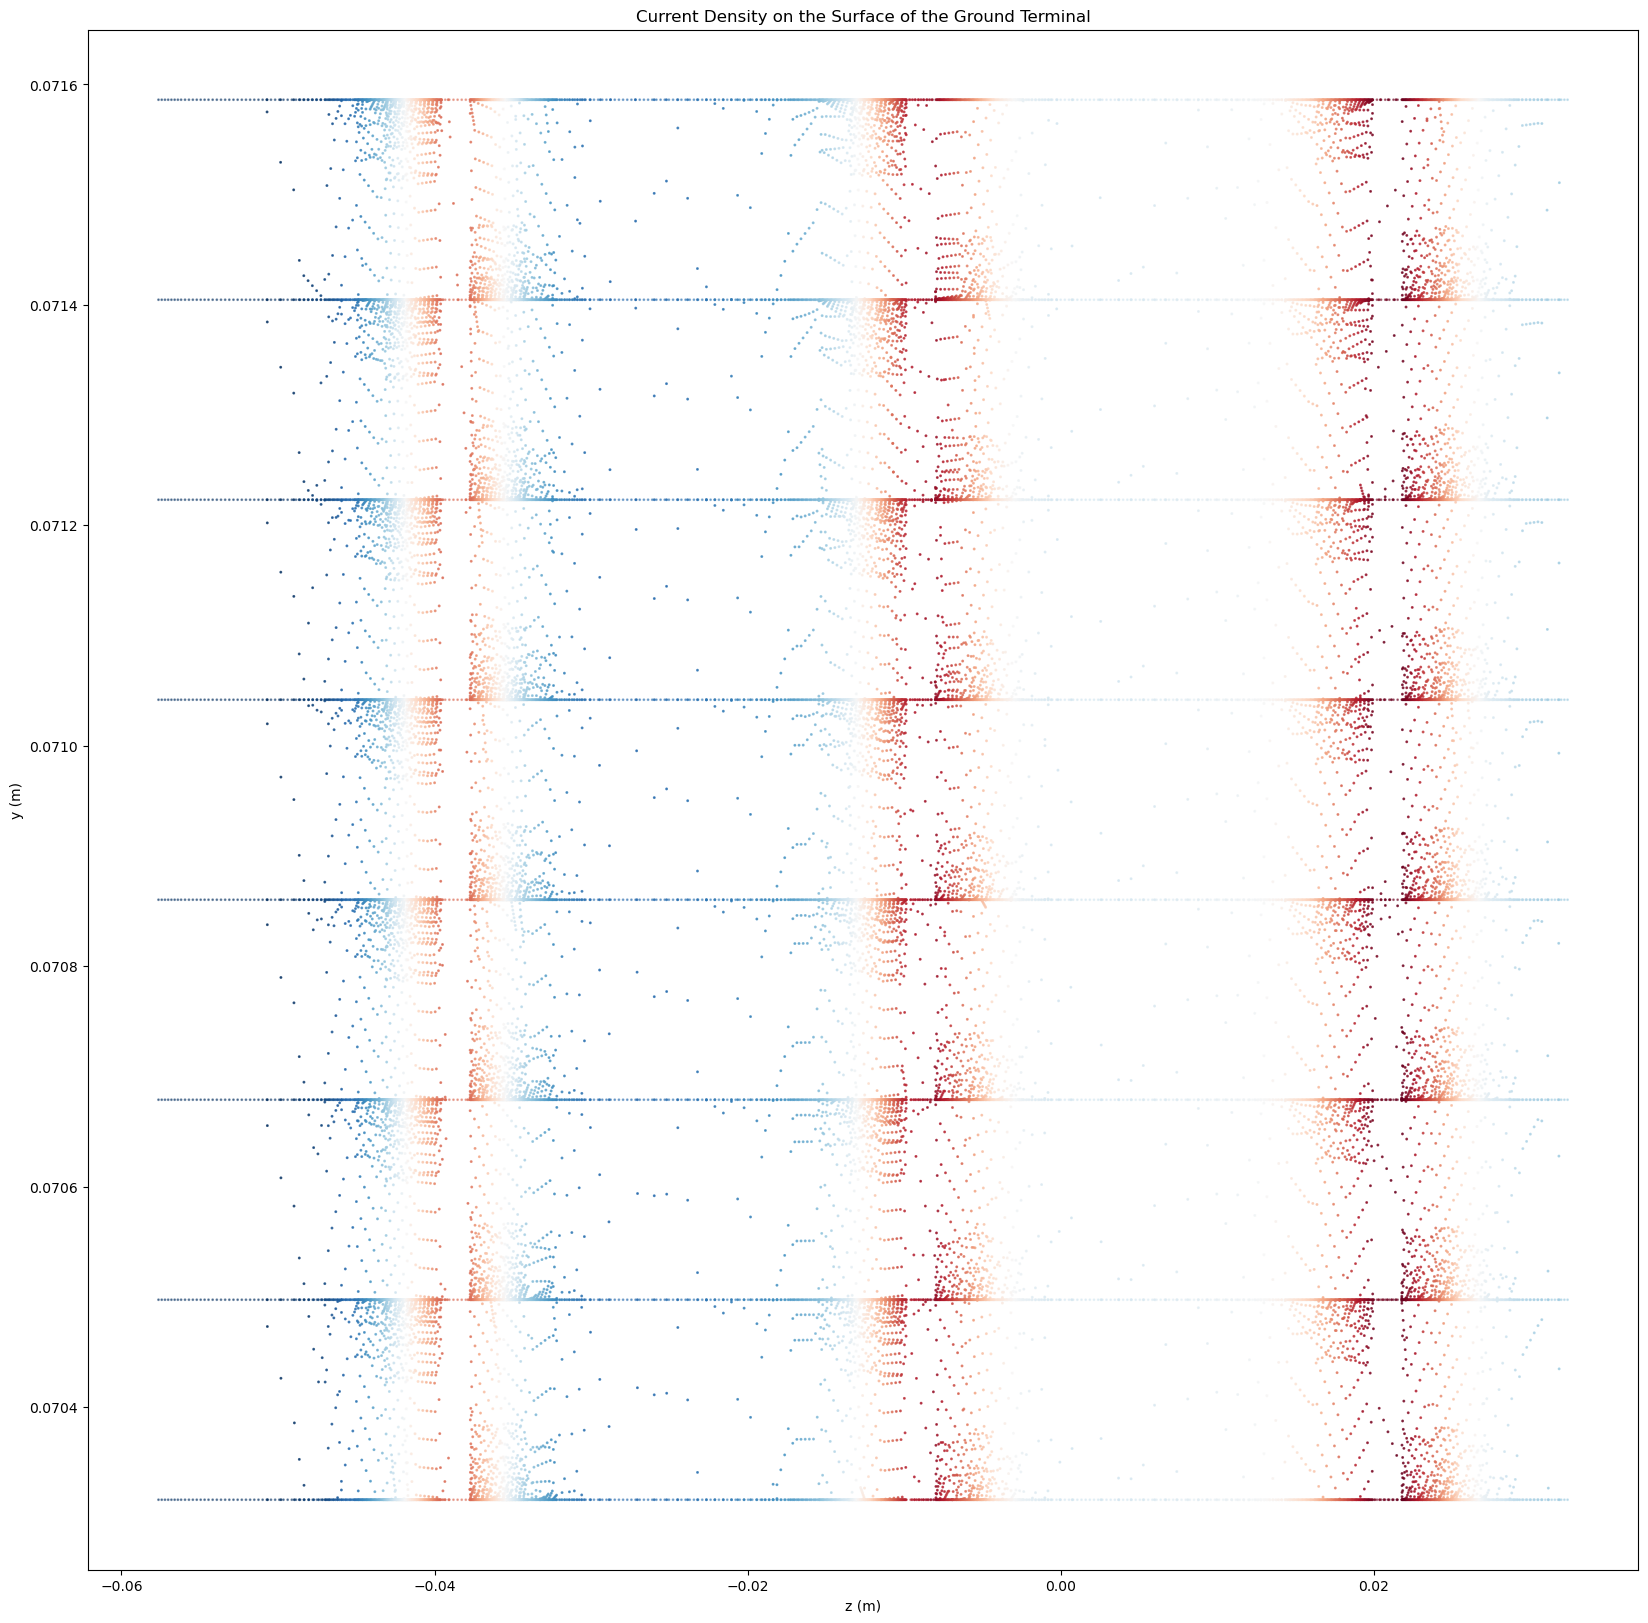

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(current_density_df['z'], current_density_df['y'], c=current_density_df['J'], cmap='RdBu_r', s=1, alpha=0.5)

# Add a colorbar
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)')
ax.set_xlabel('z (m)')
ax.set_ylabel('y (m)')
ax.set_title('Current Density on the Surface of the Ground Terminal')

In [6]:
# First, let's create a uniform grid
y_grid = np.linspace(current_density_df['y'].min(), current_density_df['y'].max(), 5000)
z_grid = np.linspace(current_density_df['z'].min(), current_density_df['z'].max(), 5000)

dy = y_grid[1] - y_grid[0]
dz = z_grid[1] - z_grid[0]
print(f'dy = {dy}, dz = {dz}')

dy = 2.540528105665629e-07, dz = 1.8003600720142843e-05


In [7]:
# Now, let's create a meshgrid
Y, Z = np.meshgrid(y_grid, z_grid)

# Now, let's interpolate the current density data to the uniform grid
J_grid = griddata((current_density_df['y'], current_density_df['z']), current_density_df['J'], (Y, Z), method='linear')
print(J_grid.shape)
print(J_grid)

(5000, 5000)
[[               nan -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 [-17465289.94143819 -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 [-17465289.94143819 -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 ...
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]]


In [8]:
hist, y_edges, z_edges = np.histogram2d(endpoints_df['y'], endpoints_df['z'], bins=(y_grid, z_grid))
max_wire_endpoints_per_voxel = hist.max()
print(max_wire_endpoints_per_voxel)

1.0


In [9]:
# Convert endpoint coordinates to voxel indices
y_indices = np.digitize(endpoints_df['y'], y_grid) - 1
z_indices = np.digitize(endpoints_df['z'], z_grid) - 1
    
# Create an array of (y, z) voxel positions
voxel_positions = np.column_stack((y_indices, z_indices))
    
# Compute the Chebyshev distance between all pairs
min_distance = np.inf
num_points = len(voxel_positions)

# Compute the minimum wire distance in voxels
for i in range(num_points):
    for j in range(i + 1, num_points):  # Avoid duplicate comparisons
        dist = np.max(np.abs(voxel_positions[i] - voxel_positions[j]))
        min_distance = min(min_distance, dist)

min_wire_distance_voxels = min_distance
print(min_wire_distance_voxels)

3


In [10]:
# Now, let's develop an algorithm that would assign a current value for each wire endpoint by integrating the current density over the 9 voxels surrendoung the endpoint (including the voxel the endpoint is in)
# The calculation for i would be i = sum(J_grid[voxel] * dy * dz) for voxel in voxels_surrounding_i

# Let's create a new column in the endpoints_df dataframe to store the current values
endpoints_df['I'] = 0.0

# Now, let's iterate over all the endpoints and calculate the current value
for i, endpoint in endpoints_df.iterrows():
    y_index = np.digitize(endpoint['y'], y_grid) - 1
    z_index = np.digitize(endpoint['z'], z_grid) - 1
    # Let's check if this is working
    # print(f'Endpoint {i} is in voxel ({y_index}, {z_index})')
    # print(f'Point coords = ({endpoint["y"]}, {endpoint["z"]})')
    # print(f'Voxel coords = ({y_grid[y_index]}, {z_grid[z_index]})')
    
    voxels_surrounding_i = [(y, z) for y in range(y_index - 1, y_index + 2) for z in range(z_index - 1, z_index + 2) if 0 <= y < len(y_grid) and 0 <= z < len(z_grid)]
    # print(f'Voxels surrounding {i} = {voxels_surrounding_i}')
    # print(f'Grid points = {[(y_grid[y], z_grid[z]) for y, z in voxels_surrounding_i]}')
    
    I = 0.0
    for y, z in voxels_surrounding_i:
        I += J_grid[z, y] * dy * dz
        
    endpoints_df.at[i, 'I'] = I
    # endpoints_df.at[i, 'I'] = I*1000

In [70]:
endpoints_df


,x,y,z,Time,x-velocity,y-velocity,z-velocity,Color,I
1,0.103449,0.070623,0.010585,500.0,0.012501,5.194898e-08,-7.888591e-06,0.012497,-0.000515
10,0.103449,0.070814,0.022047,500.0,0.007078,2.699113e-08,-3.586449e-06,0.007080,-0.000293
100,0.103449,0.071233,0.017673,500.0,0.009198,8.633902e-09,3.079325e-06,0.009197,-0.000381
101,0.103449,0.070891,0.013220,500.0,0.012001,-9.632709e-09,1.218598e-06,0.012001,-0.000495
102,0.103449,0.071336,0.011293,500.0,0.012392,-2.143132e-07,6.619243e-07,0.012392,-0.000510
...,...,...,...,...,...,...,...,...,...
92,0.103449,0.070473,0.013637,500.0,0.011882,-9.205098e-09,1.206955e-06,0.011881,-0.000489
93,0.103449,0.070660,0.002952,500.0,0.013077,8.131190e-09,-1.783513e-07,0.013077,-0.000539
94,0.103449,0.070685,0.006669,500.0,0.012824,7.529419e-10,3.561228e-07,0.012824,-0.000529
97,0.103449,0.070639,0.010547,500.0,0.012499,-9.415432e-09,3.644146e-06,0.012500,-0.000515


In [51]:
J_grid_downsampled

array([[               nan, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       [-17465289.94143819, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       [-17465289.94143819, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       ...,
       [-14056257.29217963, -14055108.19932388, -14053959.10646814, ...,
        -14055757.20286378, -14055667.96470375, -14055578.72654372],
       [-14056257.29217963, -14056257.29217963, -14056257.29217963, ...,
        -14056257.29217963, -14056257.29217963, -14056257.29217963],
       [-14056257.29217963, -14056257.29217963, -14056257.29217963, ...,
        -14056257.29217963, -14056257.29217963, -14056257.29217963]])

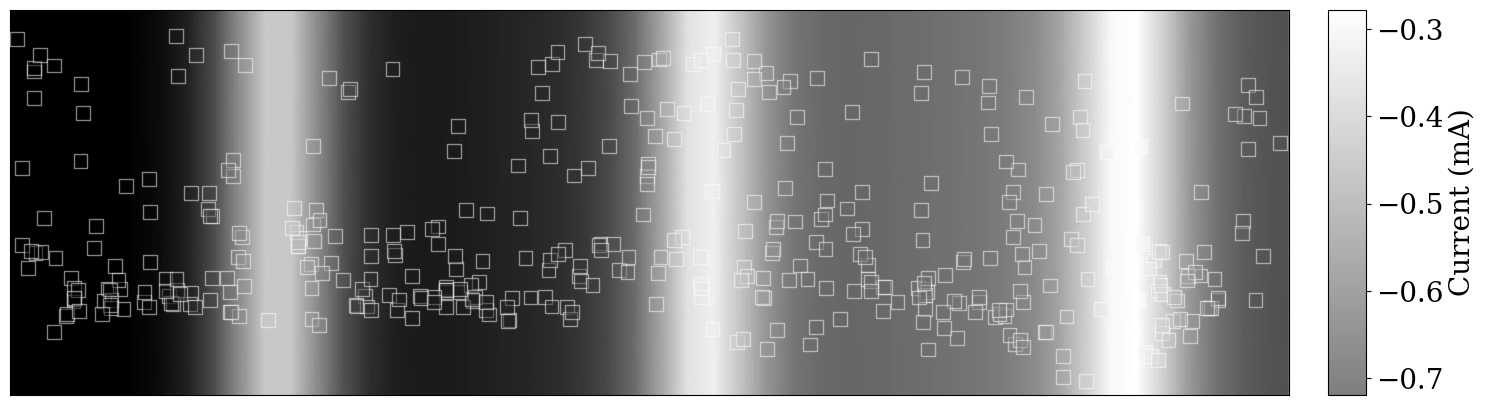

In [ ]:

# all fonts should be 20 and times new roman
plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})


# Now let's plot the current values as scatter points on top of the current density plot
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the current density

# Downsample by 5
Z_downsampled = Z[::5, ::5]
Y_downsampled = Y[::5, ::5]
J_grid_downsampled = J_grid[::5, ::5]

contour = ax.scatter(Z_downsampled, Y_downsampled, c=J_grid_downsampled, cmap='gist_gray', s=1, alpha=0.25)

# Plot the wire endpoints
wireendpoints = ax.scatter(endpoints_df['z'], endpoints_df['y'], c=1000*endpoints_df['I'], cmap='gist_gray', s=100, alpha=0.5, marker='s', zorder=100, edgecolors='white')#, vmin=-0.1, vmax=0.1)

# # Let's pick a random point of current endpoint and check where the neighbouring voxels are pictorially
# y_index = np.digitize(endpoints_df['y'].iloc[200], y_grid) - 1
# z_index = np.digitize(endpoints_df['z'].iloc[200], z_grid) - 1


# # Let's plot the voxel the endpoint is in
# ax.scatter(z_grid[z_index], y_grid[y_index], c='r', s=10, marker='o', alpha=0.1)

# Let's plot the voxels surrounding a random endpoint
voxels_surrounding_i = [(y, z) for y in range(y_index - 1, y_index + 2) for z in range(z_index - 1, z_index + 2) if 0 <= y < len(y_grid) and 0 <= z < len(z_grid)]

for y, z in voxels_surrounding_i:
    ax.scatter(z_grid[z], y_grid[y], c='black', s=10, marker='x', alpha=0.1)

# # Add a colorbar
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)')
fig.colorbar(wireendpoints, ax=ax, label='Current (mA)', aspect=10, pad=0.025)
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)', aspect=10, pad=0.05)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(Z.min(), Z.max())
ax.set_ylim(Y.min(), Y.max())

plt.savefig('current_density_and_wire_endpoints.png', dpi=300, bbox_inches='tight')
# ax.axis('off')

z_index = 979
z_grid[z_index] = -0.04000596910841922


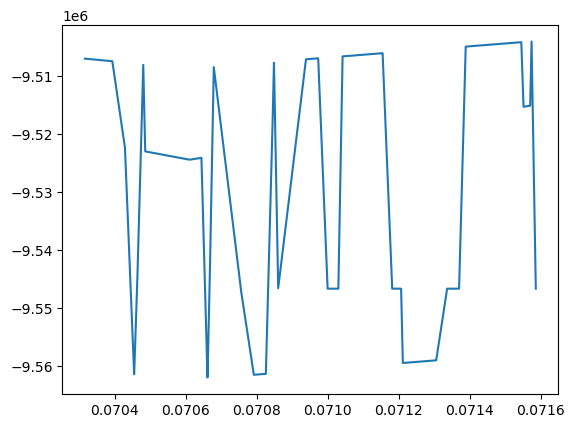

In [67]:
# Take a vertical slice of the J_grid at some z value

z_val = -0.04
z_index = np.digitize(z_val, z_grid) - 1
print(f'z_index = {z_index}')
print(f'z_grid[z_index] = {z_grid[z_index] }')

J_slice = J_grid[z_index, :]

fig, ax = plt.subplots()
ax.plot(y_grid, J_slice)
# ax.set_ylim(-9e-6, -8e-6)


In [ ]:
# I need to check if there are current density gradients in the y direction, let's sample the current density at a few points in the y direction

J_grid_y_samples = J_grid[:, ::1000]
J_grid_z_samples = J_grid[::1000, :]

y_diff = np.diff(y_grid[::1000])
z_diff = np.diff(z_grid[::1000])

J_y_gradients = np.diff(J_grid_y_samples, axis=0) / y_diff[:, None]
J_z_gradients = np.diff(J_grid_z_samples, axis=1) / z_diff


fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(y_grid[::1000], J_y_gradients)

# ax.plot(z_grid, J_grid_y_samples)
# ax.plot(y_grid, J_grid_z_samples.T)
ax.set_xlabel('z (m)')
ax.set_ylabel('Current Density (A/m^2)')
ax.set_title('Current Density in the z direction at various y values')


ValueError: operands could not be broadcast together with shapes (4999,5) (4,1) 